<a href="https://colab.research.google.com/github/Firaol-Tolessa/PRODIGY_ML_01/blob/main/LinearRegression_Sale_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
# Load the CSV file for analysis
property = pd.read_csv("/content/drive/MyDrive/kaggle/train.csv")
#property_test = pd.read_csv("test.csv")
property.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


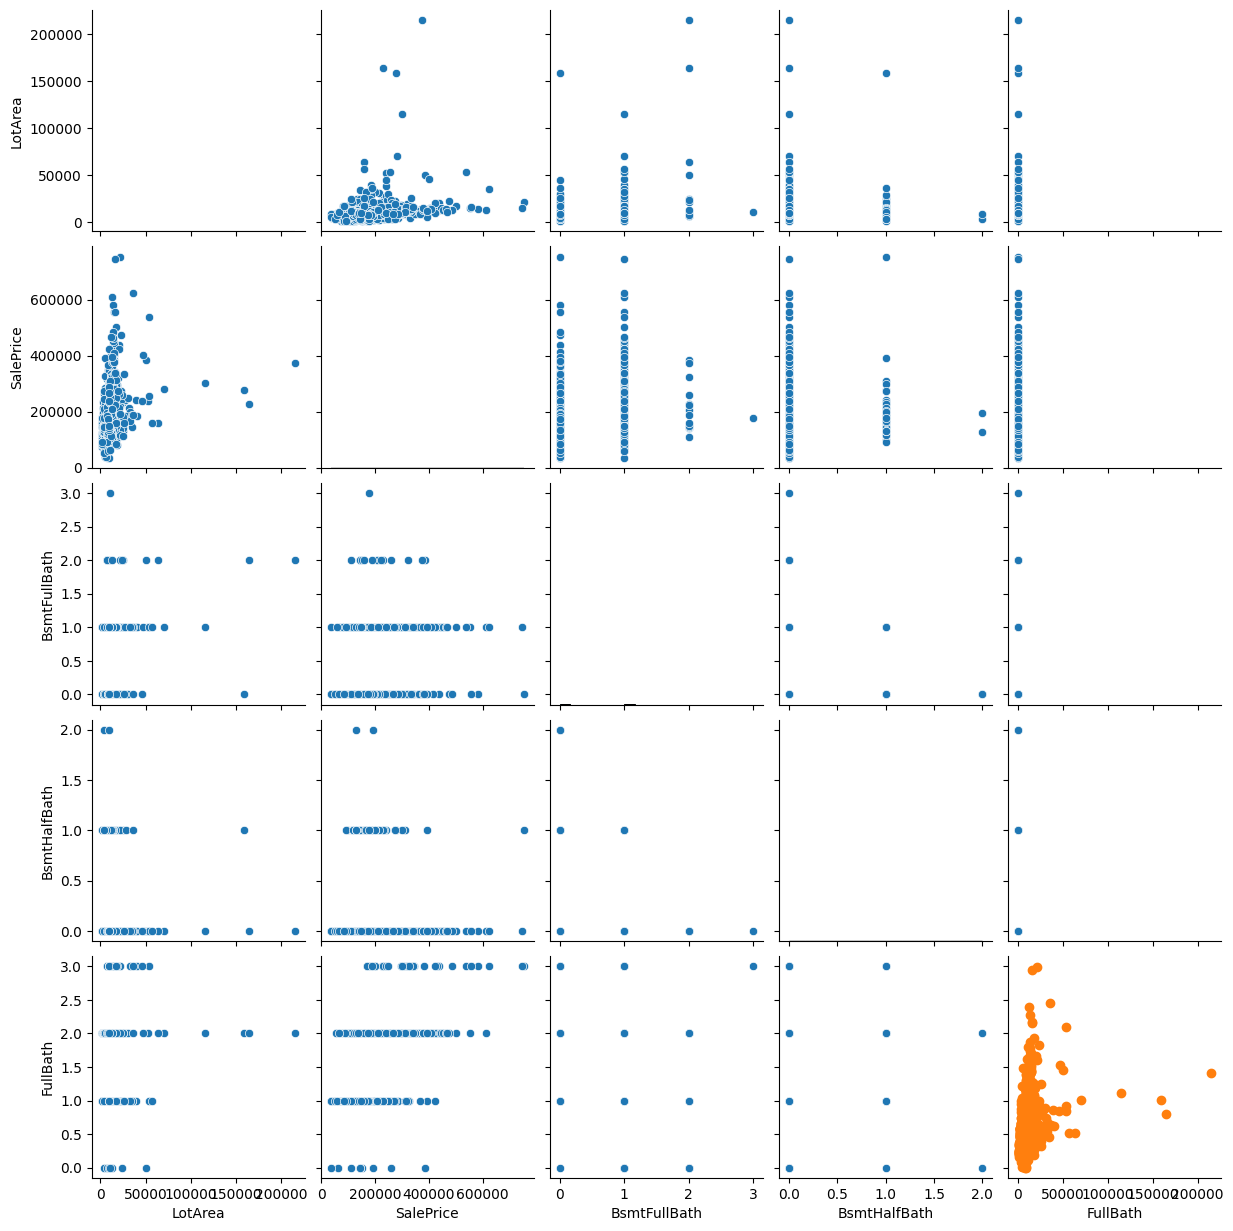

<ipython-input-11-b8fbdb32663e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = property.corr()


<Axes: >

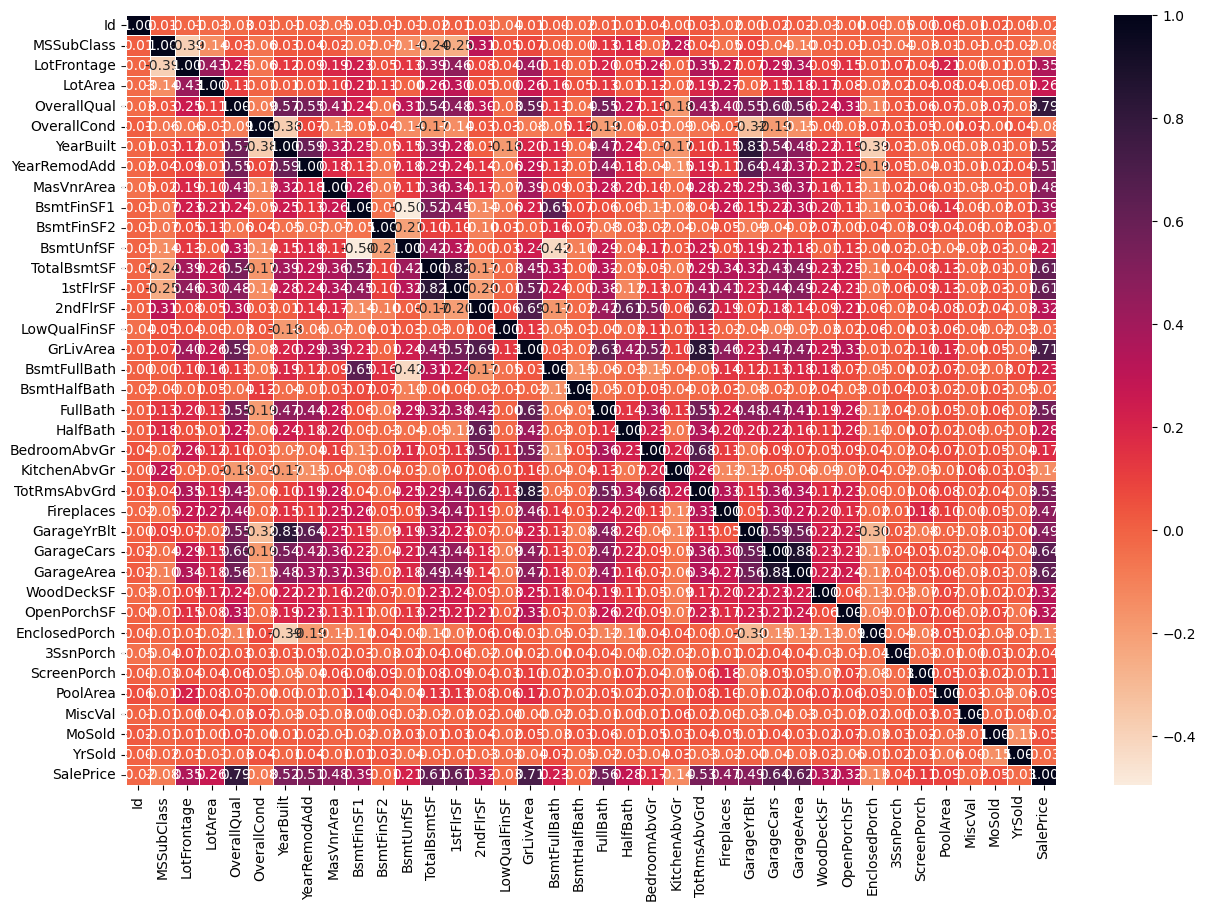

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(vars=['LotArea','SalePrice','BsmtFullBath','BsmtHalfBath','FullBath'],data=property)
plt.scatter(x='LotArea', y='SalePrice', data=property)
plt.show()

#Generate heat map to find the correlating column attribute
correlation_matrix = property.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', linewidths=0.5, fmt='.2f')


In [12]:
# Select the most relating features to the sale price
x_train = property[['LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','GarageArea','GrLivArea']]
y_train = property['SalePrice']

In [13]:

# Load the Test data
property_test = pd.read_csv("/content/drive/MyDrive/kaggle/test.csv")
property.head()

x_test = property[['LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','GarageArea','GrLivArea']]


In [14]:
from sklearn.linear_model import LinearRegression
# Create a linerregression model
model = LinearRegression()

#Train the model on the data
model.fit(x_train,y_train)
#Calculate the loss
r_sq = model.score(x_train, y_train)


print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


y_pred = model.predict(x_test)
print(y_pred)

coefficient of determination: 0.6726231876541442
intercept: 5978.703552870691
slope: [ 3.99044722e-01  2.18295670e+04  1.25866912e+04  2.67448898e+04
  6.61239584e+03 -1.82266262e+04  1.01431487e+02  7.95912862e+01]
[228288.04966072 168308.81226733 241540.20186701 ... 201974.48515318
 132120.38897859 138412.73092871]


In [19]:
# Write to a csv file
import pandas as pd

df = pd.DataFrame(columns=['id', 'SalePrice'])
id= 1461
for i,sale in enumerate(y_pred):
  df.loc[i] = [id,sale]
  id+=1
df.to_csv('output.csv', index=False)